In [34]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from PIL import Image
import pandas as pd

In [35]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

sp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(sp)

rp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(rp)

pp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(pp)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [36]:
sp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(sp)

rp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(rp)

pp = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(pp)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


학습데이터(x_train)의 이미지 개수는 300 입니다.
최소값: 0  최대값: 219
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


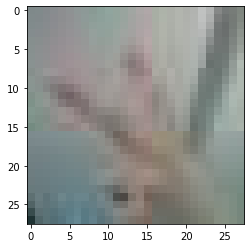

In [38]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))


x_train_norm = x_train/216   # 입력은 0~1 사이의 값으로 정규화


#X_train = x_train[:80]
#Y_train = y_train[:80]
#x_val = x_train[80:]
#y_val = y_train[80:]


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(X_train[69],cmap=plt.cm.binary)
plt.show()

In [29]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)

print('최소값:',np.min(x_test), ' 최대값:',np.max(x_test))


x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
최소값: 0  최대값: 255
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


test_loss: 1.1052027940750122 
test_accuracy: 0.3333333432674408
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 9, 9, 16)          4624      
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 256)               0         
______________________________________________________

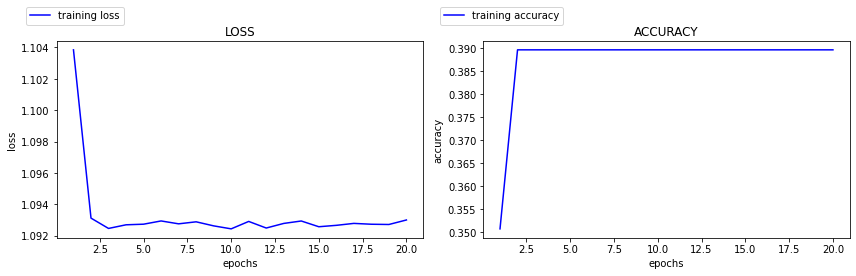

In [52]:
# validation을 적용시킨 모델이지만 오히려 loss가 높아졌다

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
# 이미지가 컬러이므로 input_shape의 차원수를 3으로 바꿔주기
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(6, activation='softmax'))
model.add(keras.layers.Dense(3, activation='softmax'))


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=20, batch_size=1, verbose=0)
# 셀이 쓸데 없이 길어지는 것을 방지하기 위해 verbose를 0으로 설정

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=0)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

model.summary()

print(history.history.keys())

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(history)

In [41]:
# 정확도가 낮은 원인을 학습시킨 이미지의 질이 낮기 때문이라 판단해,
# 기존에 있던 학습 데이터 대신 test 데이터를 학습시키고,
# 제 손을 찍은 사진으로 테스트 해보겠습니다

s = os.getenv("HOME") + "/aiffel/private/rsp_test/s"
resize_images(s)

r = os.getenv("HOME") + "/aiffel/private/rsp_test/r"
resize_images(r)

p = os.getenv("HOME") + "/aiffel/private/rsp_test/p"
resize_images(p)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


학습데이터(x_t)의 이미지 개수는 300 입니다.
최소값: 0  최대값: 219
x_t shape: (300, 28, 28, 3)
y_t shape: (300,)


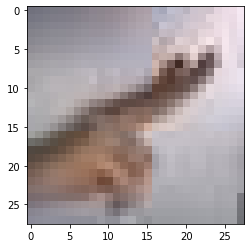

In [42]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/s/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/r/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/p/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_t)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/private/rsp_test"
(x_t, y_t)=load_data(image_dir_path)

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))


x_train_norm = x_t/216.0   # 입력은 0~1 사이의 값으로 정규화

print("x_t shape: {}".format(x_t.shape))
print("y_t shape: {}".format(y_t.shape))

plt.imshow(x_t[0],cmap=plt.cm.binary)
plt.show()

test_loss: 1.0988835096359253 
test_accuracy: 0.3333333432674408


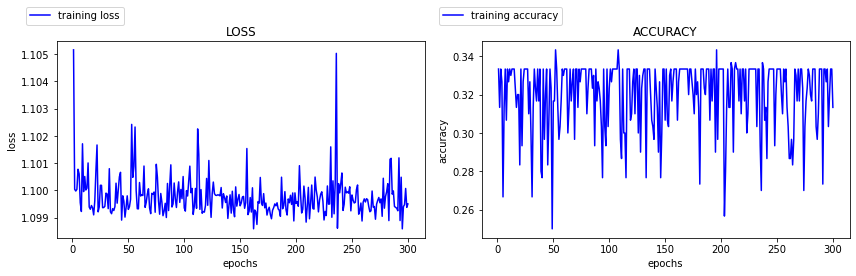

In [43]:
t_model=keras.models.Sequential()
t_model.add(keras.layers.Conv2D(32, (16,16), activation='relu', input_shape=(28,28,3)))
# 이미지가 컬러이므로 input_shape의 차원수를 3으로 바꿔주기
t_model.add(keras.layers.Conv2D(32, (8,8), activation='relu', input_shape=(28,28,3)))
t_model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(28,28,3)))
t_model.add(keras.layers.MaxPooling2D(pool_size=(16,16), strides=4, padding='same'))
t_model.add(keras.layers.MaxPooling2D(pool_size=(8,8), strides=2, padding='same'))
t_model.add(keras.layers.Flatten())
t_model.add(keras.layers.Dense(30, activation='relu'))
t_model.add(keras.layers.Dense(16, activation='softmax'))
t_model.add(keras.layers.Dense(6, activation='tanh'))
t_model.add(keras.layers.Dense(3, activation='softmax'))

sgd = keras.optimizers.SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
t_model.compile(optimizer=sgd,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


t_history = t_model.fit(x_train, y_train, epochs=300, batch_size = 32, verbose=0)
# 셀이 쓸데 없이 길어지는 것을 방지하기 위해 verbose를 0으로 설정

test_loss, test_accuracy = t_model.evaluate(x_t,y_t, verbose=0)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(t_history)

357  images to be resized.
357  images resized.
450  images to be resized.
450  images resized.
348  images to be resized.
348  images resized.
학습데이터(x_train)의 이미지 개수는 1155 입니다.
최소값: 0  최대값: 255
x_train shape: (1155, 28, 28, 3)
y_train shape: (1155,)


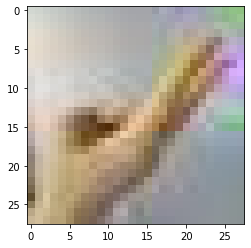

test_loss: 7.611262321472168 
test_accuracy: 0.4333333373069763
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 11, 11, 40)        5800      
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 9, 9, 32)          11552     
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 3, 3, 16)          0         
_______________________________________________________

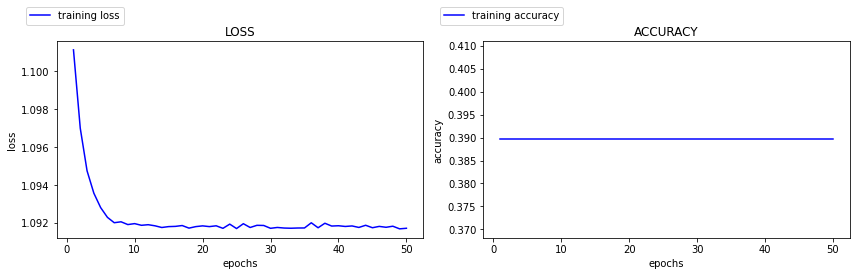

In [49]:
# 학습 데이터 제한을 없앤 모델

sp = os.getenv("HOME") + "/aiffel/private/rsp_test2/scissor"
resize_images(sp)

rp = os.getenv("HOME") + "/aiffel/private/rsp_test2/rock"
resize_images(rp)

pp = os.getenv("HOME") + "/aiffel/private/rsp_test2/paper"
resize_images(pp)


def load_data(img_path, number_of_data=1155):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/private/rsp_test2"
(x_train, y_train)=load_data(image_dir_path)

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))


x_train_norm = x_train/255   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()


e_model=keras.models.Sequential()
e_model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
# 이미지가 컬러이므로 input_shape의 차원수를 3으로 바꿔주기
e_model.add(keras.layers.MaxPool2D(2,2))
e_model.add(keras.layers.Conv2D(40, (3,3), activation='elu'))
e_model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
e_model.add(keras.layers.Conv2D(16, (3,3), activation='relu'))
e_model.add(keras.layers.MaxPooling2D((2,2)))
e_model.add(keras.layers.Flatten())
e_model.add(keras.layers.Dense(9, activation='softmax'))
e_model.add(keras.layers.Dense(6, activation='softmax'))
e_model.add(keras.layers.Dense(3, activation='softmax'))


e_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


e_history = e_model.fit(x_train, y_train, epochs=50, verbose=0)
# 셀이 쓸데 없이 길어지는 것을 방지하기 위해 verbose를 0으로 설정

test_loss, test_accuracy = model.evaluate(x_t,y_t, verbose=0)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

e_model.summary()

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(e_history)

test_loss: 7.878561019897461 
test_accuracy: 0.25333333015441895


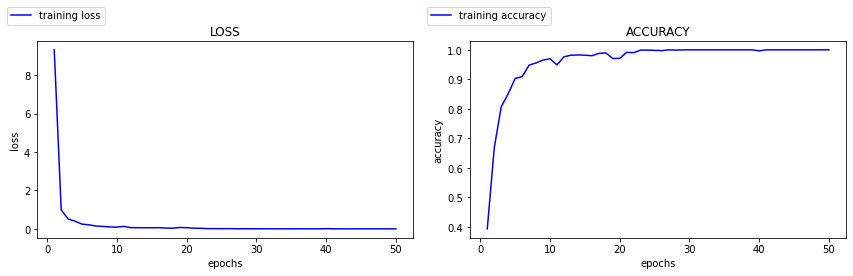

In [50]:
b_model=keras.models.Sequential()
b_model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
b_model.add(keras.layers.MaxPool2D(2,2))
b_model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
b_model.add(keras.layers.MaxPooling2D((2,2)))
b_model.add(keras.layers.Flatten())
b_model.add(keras.layers.Dense(32, activation='relu'))
b_model.add(keras.layers.Dense(10, activation='softmax'))


b_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


b_history = b_model.fit(x_train, y_train, epochs=50, verbose=0)
# 셀이 쓸데 없이 길어지는 것을 방지하기 위해 verbose를 0으로 설정

test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=0)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

plot_history(b_history)

정확도를 올리고 loss를 낮추기 위해 1200개 가량 되는 이미지를 학습한 모델을 가져오고자 했습니다
하지만, 1200장의 이미지를 학습시킨 모델이나 300개를 학습시킨 모델이나 정확도 및 loss는 비슷하더군요
그래서 이건 모델을 만들때 뭔가 공정이 더 필요하구나란 생각이 들었습니다

그래서 이미지의 양은 똑같으나 이미지를 회전하거나, 옮겨서 이미지의 파생을 만든 뒤 이 이미지를 학습시켜보자란 생각을 해봤습니다
허나 좀 더 깊게 생각해보니, 제가 학습 이미지 량을 늘렸을 때 이미 손을 여러방향으로 돌리거나 움직였고, 이게 image augmentation 이랑 다를게 뭔가 란 생각이 들더군요
또 제가 감당할 수 없을 정도로 많은 오류가 일어나 결론적으로 이 방식은 포기하게 되었습니다


결과
:
실패했습니다
학습량을 늘려보기도 해봤고, 학습 데이터를 새로 찍은 데이터로 바꾸기도 해봤지만
목표였던 정확도 60%는 달성하지 못했습니다


힘들었던 것들
:
하이퍼 파라미터를 아무리 제어해봐도 소수점 3번째 자리만 움직이다보니 뭐 어떻게 해야될지 전혀 감이 안 잡히더군요
하이퍼 파라미터를 어떻게 조정해야 되는지 정보가 필요합니다

아무리 파이썬을 공부했다 하더라도, 파이썬은 결국 도구일 뿐이라는 사실을 알게되었습니다
오류 메시지가 떠서 구글링 해봐도 제가 모르는 인공지능 이론으로 에러를 설명하니,
어떻게 해결해야 될지 알 수 없어 문제를 해결할 수 없었습니다


필요하다 느끼는 것들
:
인공지능 성능을 올리는 방법을 지도학습으로 경험할 필요가 있다고 느꼈습니다
아무리 시그모이드, relu, elu, 이미지 필터, strides 등의 이론을 알고 있다 하더라도,
실제 인공지능 모델에 어떻게 빌드업을 하는지 알 수 없어 제가 빌드업을 할 수 없었습니다